**Importing modules and loading data**

In [1]:
%run ./echino_loader.ipynb
tile_size = 500 # pixels

Imports complete
Loaded 92 images from /pml/wsi_data 

Paths are all set, dataset splitting done 



In [2]:
caseRandomizer()

Loaded 92 images from /pml/wsi_data 



(['echino_76_3',
  'echino61',
  'echino_72_002',
  'echino51',
  'echino_77_1',
  'norm25',
  'Normalliver16',
  'echino28',
  'norm12',
  'normal_70',
  'echino_79_1',
  'echino24',
  'normal3',
  'echino38',
  'echino26',
  'echino17',
  'echino36',
  'echino_69_03',
  'echino50',
  'echino_69_3',
  'norm_79_1',
  'echino39',
  'echino14',
  'norm26',
  'echino41',
  'normal2',
  'Norm21',
  'Normalliver19',
  'echino31',
  'echino32',
  'echino13',
  'echino_71_2',
  'Norm22',
  'echino19',
  'echino23',
  'normal5',
  'normal1',
  'normal4',
  'Norm20',
  'echino_72_001',
  'echino_78_2',
  'normal6',
  'echino_74_001',
  'normal8',
  'echino8',
  'echino_69_02',
  'echino3',
  'norm13',
  'echino60',
  'Normalliver18',
  'echino25',
  'echino_69_1',
  'echino_75_002',
  'echino_71_002',
  'normal_69_1'],
 ['normal7',
  'echino40',
  'norm_80_0001',
  'echino52',
  'echino_71_003',
  'norm_75_001',
  'norm_72_01',
  'norm_69_01',
  'echino_69_4',
  'echino_76_1',
  'echino_72_2',


**Tissue detection**

In [3]:
# it checks for existing pml files
tissueDetection(tile_size)

pml file exists for echino_76_3 as /pml/slides/echino_76_3.pml
pml file exists for echino61 as /pml/slides/echino61.pml
pml file exists for echino_72_002 as /pml/slides/echino_72_002.pml
pml file exists for echino51 as /pml/slides/echino51.pml
pml file exists for echino_77_1 as /pml/slides/echino_77_1.pml
pml file exists for norm25 as /pml/slides/norm25.pml
pml file exists for Normalliver16 as /pml/slides/Normalliver16.pml
pml file exists for echino28 as /pml/slides/echino28.pml
pml file exists for norm12 as /pml/slides/norm12.pml
pml file exists for normal_70 as /pml/slides/normal_70.pml
pml file exists for echino_79_1 as /pml/slides/echino_79_1.pml
pml file exists for echino24 as /pml/slides/echino24.pml
pml file exists for normal3 as /pml/slides/normal3.pml
pml file exists for echino38 as /pml/slides/echino38.pml
pml file exists for echino26 as /pml/slides/echino26.pml
pml file exists for echino17 as /pml/slides/echino17.pml
pml file exists for echino36 as /pml/slides/echino36.pml
p

**checking tissue detection results**

In [4]:
#detectionchecking()

**Tile extraction**

In [5]:
#eliminate unwanted directories
#instead of (dev/pathml-tutorial/analysis/tiles$ find -name echinococcus -exec rm -rf {} \;)

# Search for unwanted files and directories
# tiles_to_remove = Path(analysis_dir_path).glob("**/*echinococcus*")
# files = [x for x in p if x.is_file()]
# print(tiles_to_remove)

# Actual delete operation - uncomment to run
# tiles_to_remove.unlink()


#%store -d global_channel_sums
#%store -d global_channel_squared_sums
#%store -d global_tile_count
#global_channel_sums = None
#global_channel_squared_sums = None
#global_tile_count = None

In [6]:
if (not 'global_channel_sums' in globals()) or (not 'global_channel_squared_sums' in globals()) or (not 'global_tile_count' in globals()):
    %store -r global_channel_sums
    %store -r global_channel_squared_sums
    %store -r global_tile_count   
    
if global_tile_count is None: 
    tilextractor(tile_size)
elif (global_tile_count == 0) or (not 'global_channel_sums' in globals()) or (not 'global_channel_squared_sums' in globals()) or (not 'global_tile_count' in globals()):
    # if no global vars exist, re-run tile extraction
    print("Generating new tiles")
    tilextractor(tile_size)

print(f"global_tile_count: {global_tile_count}")    
print(f"global_channel_squared_sums: {global_channel_squared_sums}")    
print(f"global_channel_sums: {global_channel_sums}")


global_tile_count: 26921
global_channel_squared_sums: [4.13582480e+09 2.53607573e+09 3.46920710e+09]
global_channel_sums: [5.18187987e+09 3.91743521e+09 4.72488794e+09]


In [7]:
%store -r dataloaders
%store -r means_and_stds
%store -r dataset_sizes
%store -r global_channel_sums
%store -r global_channel_squared_sums
%store -r global_tile_count

tileworks(batch_size=48)

Channel means: [0.7699386908059693, 0.5820638477849541, 0.7020375084831544]
Channel standard deviations: [0.14733369058621432, 0.194984973960881, 0.1503600893990749]
Total number of echinococcus tiles: 15756
Total number of non-echninococcus tiles: 11602
Stored 'dataloaders' (dict)
Stored 'means_and_stds' (dict)
Stored 'dataset_sizes' (dict)


**Visualize Batch**

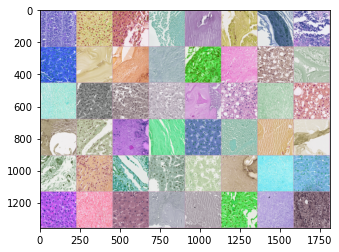

In [38]:
vizBatch()

**Model definition**

In [8]:
print(f"torch.cuda.device_count(): {torch.cuda.device_count()}")

class_names = ['Tumor','non_echinococcus']

model_ft = models.resnet18(pretrained=True, progress=False)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"using device: {device}")
if torch.cuda.device_count() > 1:
    model_ft = nn.DataParallel(model_ft)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(
    optimizer_ft, step_size=7, gamma=0.1)

# Let`s see the model

print(model_ft)


torch.cuda.device_count(): 1
using device: cuda:0
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

**Training**

In [10]:
start_time = time.time()

epochs = 15

model_ft, learningStats = train_classification_model(model_ft, 
                                                     criterion, 
                                                     optimizer_ft, 
                                                     scheduler=exp_lr_scheduler, 
                                                     num_epochs=epochs)

pickle.dump(learningStats, open(os.path.join(analysis_dir_path, 'classification_results', 
    'classification_learning_stats.p'), 'wb'))
torch.save(model_ft, os.path.join(analysis_dir_path, 'classification_results', 'classification_best_model_ft.pt'))

time_elapsed = time.time() - start_time
print('Complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [15:19<00:00,  2.23s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.15303563032879638 0.9437765205091938 0.941881447077899 0.9437494015365754 0.9437765205091938 0.9437602696295526


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [04:48<00:00,  1.83s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.0790104147660625 0.972494049193335 0.971325485839547 0.972547018694878 0.972494049193335 0.9724701735844027


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [06:17<00:00,  1.09it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.08111932346057979 0.9702465144473631 0.9698716944623098 0.9702897351890745 0.9702465144473631 0.9702604483269123


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [01:45<00:00,  1.50it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.09368157507277802 0.9582121131975668 0.9541133806865784 0.9597505624868028 0.9582121131975668 0.9580205101090279


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [06:18<00:00,  1.09it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.06174731133500057 0.9787835926449788 0.9785230875496431 0.9788063154067504 0.9787835926449788 0.9787908539758298


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [01:46<00:00,  1.48it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.10330375090302518 0.9580798730494579 0.9537530770694078 0.9598415284098313 0.9580798730494579 0.9578725068483825


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [06:19<00:00,  1.09it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.05210926025506703 0.9808547181248737 0.9805928163719682 0.9808711491938973 0.9808547181248737 0.980860136176504


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [01:45<00:00,  1.49it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.12025891674677079 0.9463104998677598 0.9406100187148168 0.9493423132578047 0.9463104998677598 0.9459321573420689


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [06:17<00:00,  1.09it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.043491243955916914 0.9846433622954132 0.9843772145283655 0.984650716526185 0.9846433622954132 0.9846460072258942


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [01:46<00:00,  1.49it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.12421606078889753 0.9472361809045227 0.941864510111421 0.9498732209554871 0.9472361809045227 0.9468943598728501


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [06:16<00:00,  1.10it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.03914127926946072 0.9859567589412003 0.9859015423687576 0.9859746351663128 0.9859567589412003 0.9859615652506684


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [01:45<00:00,  1.50it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.0917354149783818 0.9658820417878868 0.9624251965268305 0.9670132511865522 0.9658820417878868 0.9657540320782648


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [01:46<00:00,  1.49it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.12474936486069872 0.9481618619412854 0.942847365667256 0.9507577997391731 0.9481618619412854 0.94783017654721


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [06:19<00:00,  1.09it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.02794480522255046 0.9894928268337038 0.9894001343047227 0.9895001522649566 0.9894928268337038 0.9894949956647965


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [01:45<00:00,  1.49it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.07493260181150568 0.9701137265273737 0.9675261973780835 0.9706980394940531 0.9701137265273737 0.970036224542333


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [06:19<00:00,  1.09it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.027046620802230085 0.9909072539907052 0.9907683693111724 0.9909104692862382 0.9909072539907052 0.9909083523625166


100%|██████████| 158/158 [01:46<00:00,  1.49it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.0775205476199176 0.9705104469717006 0.9677922007072877 0.9711807829917342 0.9705104469717006 0.9704285012055744


100%|██████████| 413/413 [06:18<00:00,  1.09it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.025093694316205575 0.9917154980804203 0.9915997445020586 0.9917185189881411 0.9917154980804203 0.9917164988191818


100%|██████████| 158/158 [01:46<00:00,  1.49it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.08853783068650851 0.9666754826765406 0.9631986572659222 0.9678389898837024 0.9666754826765406 0.9665489500236657


100%|██████████| 413/413 [06:19<00:00,  1.09it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.026904766025086783 0.9910587997575268 0.9907422418465013 0.9910579672604546 0.9910587997575268 0.991058256077952


100%|██████████| 158/158 [01:45<00:00,  1.50it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.0795407999825167 0.9683946046019571 0.9654680634823021 0.969170159974523 0.9683946046019571 0.9682988108770892


100%|██████████| 413/413 [06:19<00:00,  1.09it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.025934358805159825 0.9909072539907052 0.9908030379422128 0.9909117582450901 0.9909072539907052 0.9909086643677444


 67%|██████▋   | 106/158 [01:11<00:35,  1.47it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



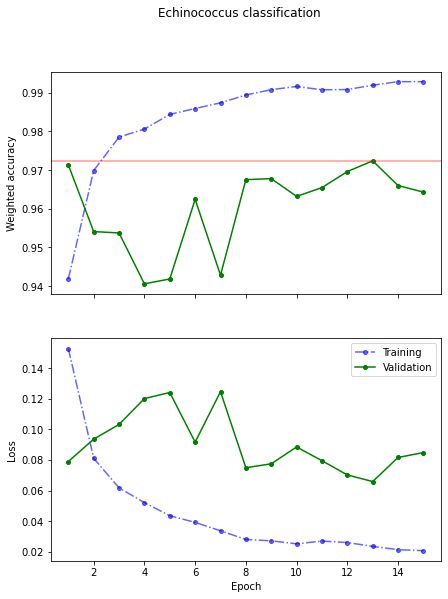

In [11]:
plotLearningCurve()

**Tile level prediction**

In [9]:
start_time = time.time()

class_names = ['Tumor','non_echinococcus']
means_and_stds = pickle.load(open(os.path.join(analysis_dir_path, 'classification_results', 'trainval_channel_means_and_stds.p'), 'rb'))
modelPath = glob.glob(os.path.join(analysis_dir_path, 'classification_results', 'classification_best_model_ft*'))[0]

dataTransforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(means_and_stds['channel_means'], means_and_stds['channel_stds'])])

trainedModel = models.resnet18(pretrained=True)
num_ftrs = trainedModel.fc.in_features
trainedModel.fc = nn.Linear(num_ftrs, 2)
trainedModel.load_state_dict(torch.load(modelPath))

for case in val_cases + test_cases:
    pathml_slide = Slide(os.path.join(pathml_slide_dir_path, case+'.pml'))
    pathml_slide.inferClassifier(trainedModel, classNames=class_names, dataTransforms=dataTransforms, tissueLevelThreshold=0.995, foregroundLevelThreshold=88, numWorkers=0, overwriteExistingClassifications=True)
    pathml_slide.save(folder=pathml_slide_dir_path)

time_elapsed = time.time() - start_time
print('Complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:31<00:00,  2.60s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [02:02<00:00,  2.51s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [06:00<00:00,  2.39s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [03:02<00:00,  2.44s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [03:13<00:00,  2.42s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 141/141 [05:33<00:00,  2.36s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:57<00:00,  2.38s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [06:01<00:00,  2.42s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [03:11<00:00,  2.43s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 174/174 [07:01<00:00,  2.42s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [02:35<00:00,  2.44s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [03:17<00:00,  2.56s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:59<00:00,  2.48s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:50<00:00,  2.30s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 78/78 [03:22<00:00,  2.59s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [03:53<00:00,  2.38s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [01:52<00:00,  2.56s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [05:56<00:00,  2.39s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.53s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 194/194 [07:44<00:00,  2.39s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [04:44<00:00,  2.43s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [01:12<00:00,  2.61s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 116/116 [04:42<00:00,  2.43s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [02:19<00:00,  2.54s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [07:32<00:00,  2.46s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 136/136 [05:25<00:00,  2.39s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 123/123 [04:55<00:00,  2.40s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104/104 [04:08<00:00,  2.39s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [03:59<00:00,  2.55s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 61/61 [02:29<00:00,  2.46s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [03:40<00:00,  2.39s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 107/107 [04:15<00:00,  2.39s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [03:26<00:00,  2.51s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 155/155 [06:15<00:00,  2.42s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [01:34<00:00,  2.49s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 107/107 [04:23<00:00,  2.46s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 153/153 [06:07<00:00,  2.40s/it]

Complete in 142m 51s


**Visualize inference heatmap**


 Visualizing val cases



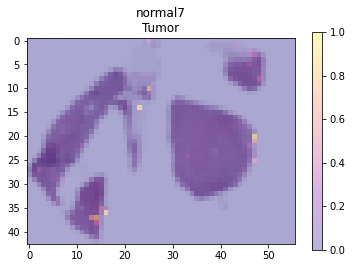

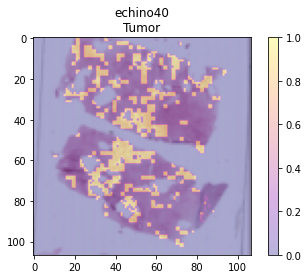

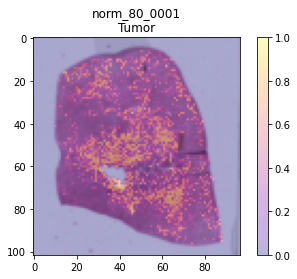

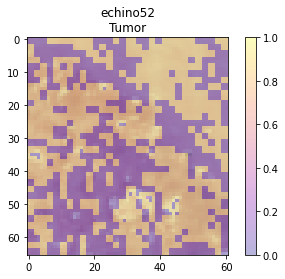

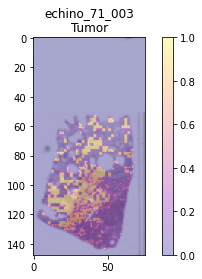

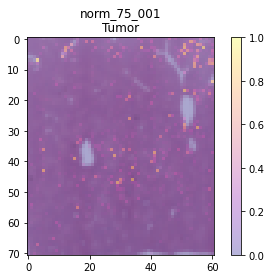

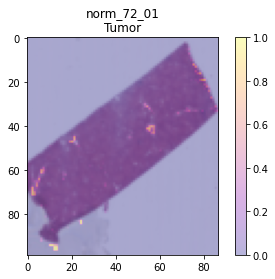

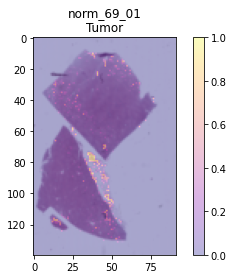

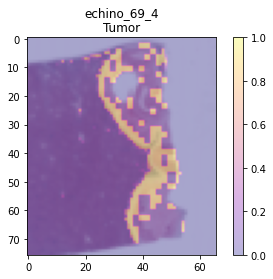

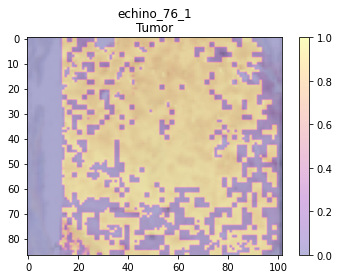

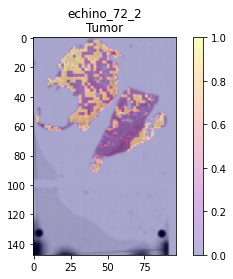

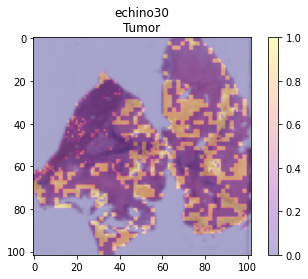

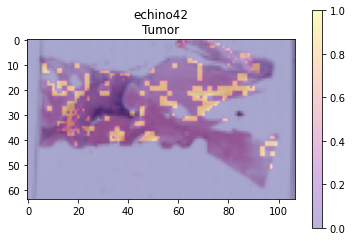

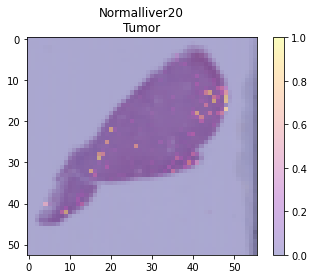

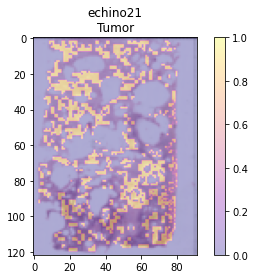

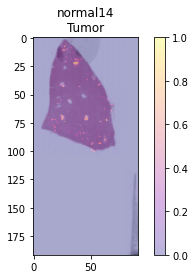

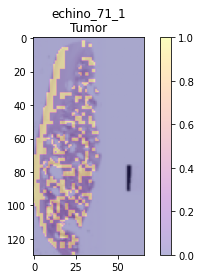

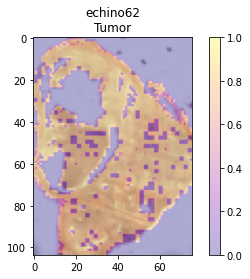

In [10]:
vizInferHeatmap_Val()


 Visualizing test cases



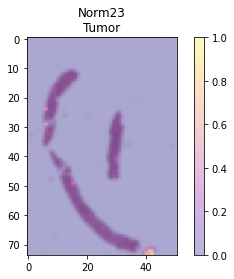

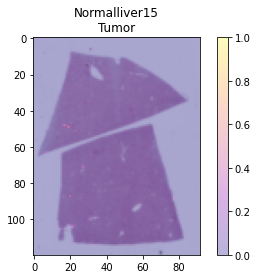

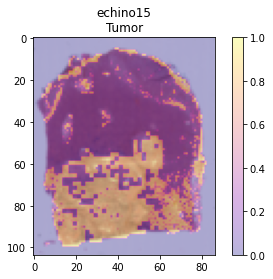

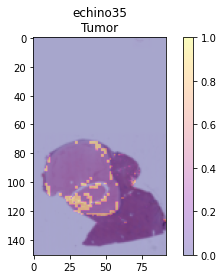

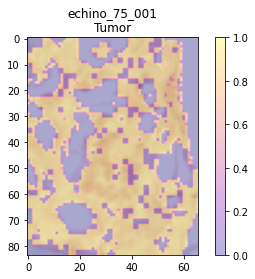

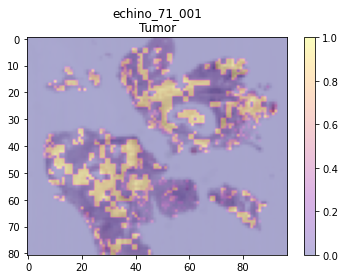

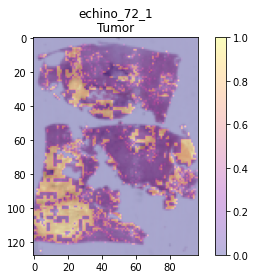

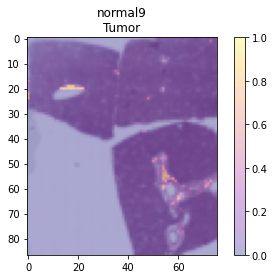

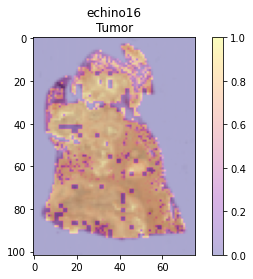

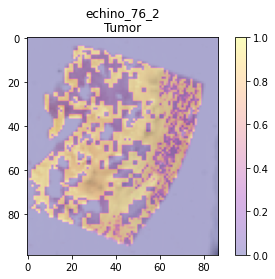

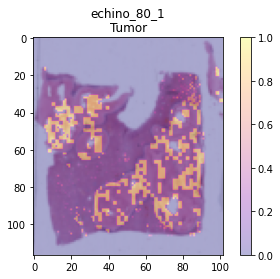

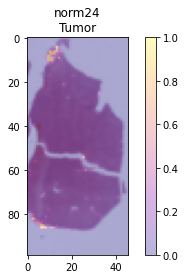

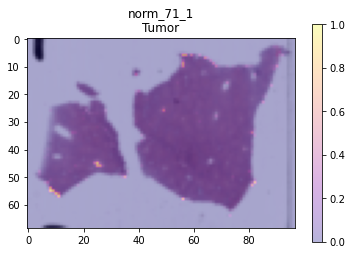

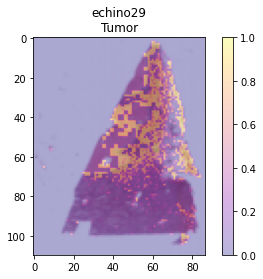

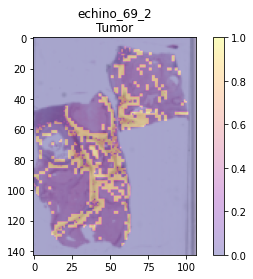

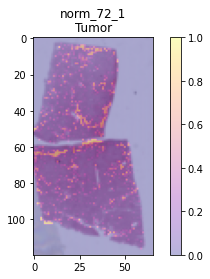

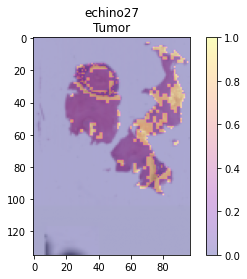

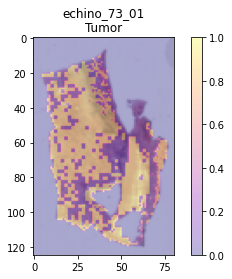

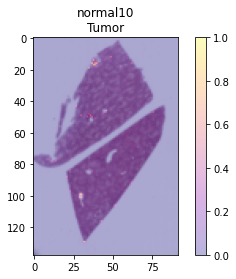

In [11]:
vizInferHeatmap_Test()

**Tile level accuracy by probability thresholds**

Best tile-level validation accuracy: 0.8365416344615801
Threshold that gives the best tile-level validation accuracy: 0.9975


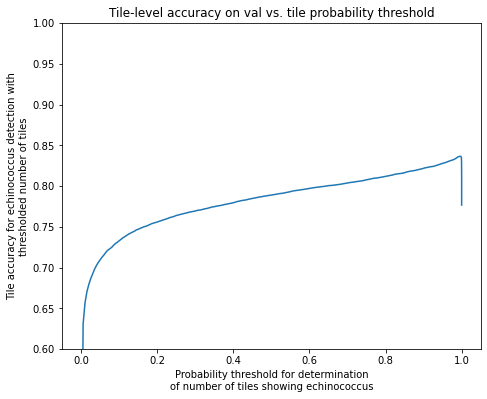

Stored 'best_classification_threshold' (float)


In [12]:
probThresholds()

**Test accuracy**

In [13]:
%store -r best_classification_threshold

testaccuracy()

Average test set accuracy at echinococcus probability threshold of 0.9975: 0.844749894478719
Case-by-case test set accuracies:
         Slide_ID  echinococcus accuracy (>0.9975)
0          Norm23                         1.000000
1   Normalliver15                         1.000000
2        echino15                         0.839383
3        echino35                         0.946429
4   echino_75_001                         0.900979
5   echino_71_001                         0.791692
6     echino_72_1                         0.823412
7         normal9                         0.997303
8        echino16                         0.475285
9     echino_76_2                         0.850178
10    echino_80_1                         0.832858
11         norm24                         1.000000
12      norm_71_1                         1.000000
13       echino29                         0.942893
14    echino_69_2                         0.577696
15      norm_72_1                         0.998273
16    

**Slide level tile counts above threshold**

In [14]:
tilecountslidelevel()


         Slide_ID  echinococcus_ground_truth  \
0          Norm23                          0   
1   Normalliver15                          0   
2        echino15                          1   
3        echino35                          1   
4   echino_75_001                          1   
5   echino_71_001                          1   
6     echino_72_1                          1   
7         normal9                          0   
8        echino16                          1   
9     echino_76_2                          1   
10    echino_80_1                          1   
11         norm24                          0   
12      norm_71_1                          0   
13       echino29                          1   
14    echino_69_2                          1   
15      norm_72_1                          0   
16       echino27                          1   
17   echino_73_01                          1   
18       normal10                          0   

    echinococcus tile count (>0.9975)  

**AUC**

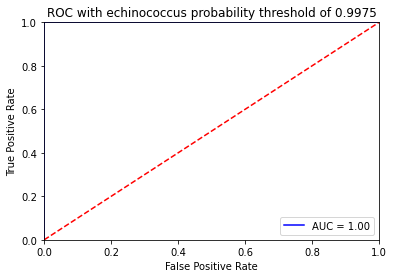

In [15]:
%store -r test_tile_counts_df

finalAUC()
   

In [16]:
!conda list
import IPython; print(IPython.sys_info())

# packages in environment at /home/ubuntu/.conda/envs/pathml-env:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                      1_llvm    conda-forge
albumentations            1.1.0                    pypi_0    pypi
alsa-lib                  1.2.3                h516909a_0    conda-forge
argcomplete               2.0.0              pyhd8ed1ab_0    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py37h5e8e339_1    conda-forge
async_generator           1.10                       py_0    conda-forge
atk-1.0                   2.36.0               h3371d22_4    conda-forge
attrs                     21.4.0             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-fo

{'commit_hash': '980a41b',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/home/ubuntu/.conda/envs/pathml-env/lib/python3.7/site-packages/IPython',
 'ipython_version': '7.31.0',
 'os_name': 'posix',
 'platform': 'Linux-5.4.0-100-generic-x86_64-with-debian-bullseye-sid',
 'sys_executable': '/home/ubuntu/.conda/envs/pathml-env/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.7.12 | packaged by conda-forge | (default, Oct 26 2021, '
                '06:08:53) \n'
                '[GCC 9.4.0]'}
